In [33]:
#importing libraries

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.ticker as tick

In [3]:
# reading in the data

df20 = pd.read_csv('year_2020_sf.csv')
df20.head()

/Users/kratipatidar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,19,21,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,launched_at,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,extracted_category
0,2020-01-03,12,A bracelet with the final stats of this projec...,"{""id"":7,""name"":""Design"",""slug"":""design"",""posit...",66.0,US,United States,2019-07-15 20:43:31,"{""id"":27262156,""name"":""Cole Klaassen"",""slug"":""...",USD,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-01-13 19:50:58,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",66.0,domestic,design
1,2020-01-01,4,A fun poster of my favorite film in chronologi...,"{""id"":27,""name"":""Graphic Design"",""slug"":""desig...",22.0,US,United States,2019-12-31 18:09:41,"{""id"":768040822,""name"":""Matt"",""is_registered"":...",USD,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,2020-01-16 01:39:25,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22.0,domestic,design
2,2020-01-06,20,"Ginger KICK! goodies for cooking and eating, i...","{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",859.0,US,United States,2020-01-03 15:20:59,"{""id"":990359968,""name"":""Danielle Ackley-McPhai...",USD,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-01-13 16:43:56,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",859.0,international,food
3,2020-01-02,81,A Make/100 project to build an adventure from ...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",419.0,US,United States,2019-12-13 16:46:43,"{""id"":1801954192,""name"":""Thom Wilson"",""slug"":""...",USD,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-01-10 22:30:00,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",419.0,domestic,games
4,2020-01-05,1,2020 Uniquely Designed Presidential Candidates...,"{""id"":263,""name"":""Apparel"",""slug"":""fashion/app...",1.0,US,United States,2019-10-02 01:47:07,"{""id"":368578001,""name"":""Cristian Cedacero"",""is...",USD,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,2020-01-15 20:08:21,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,international,fashion


In [4]:
# converting launched_at column to datetime
df20['launched_at'] = pd.to_datetime(df20['launched_at'])

# setting launched_at column as index
df20.set_index('launched_at', inplace=True)
df20.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,extracted_category
launched_at,,,,,,,,,,,,,,,,,,,,,
2020-01-03,12,A bracelet with the final stats of this projec...,"{""id"":7,""name"":""Design"",""slug"":""design"",""posit...",66.0,US,United States,2019-07-15 20:43:31,"{""id"":27262156,""name"":""Cole Klaassen"",""slug"":""...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-01-13 19:50:58,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",66.0,domestic,design
2020-01-01,4,A fun poster of my favorite film in chronologi...,"{""id"":27,""name"":""Graphic Design"",""slug"":""desig...",22.0,US,United States,2019-12-31 18:09:41,"{""id"":768040822,""name"":""Matt"",""is_registered"":...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,2020-01-16 01:39:25,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",22.0,domestic,design
2020-01-06,20,"Ginger KICK! goodies for cooking and eating, i...","{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",859.0,US,United States,2020-01-03 15:20:59,"{""id"":990359968,""name"":""Danielle Ackley-McPhai...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-01-13 16:43:56,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",859.0,international,food
2020-01-02,81,A Make/100 project to build an adventure from ...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",419.0,US,United States,2019-12-13 16:46:43,"{""id"":1801954192,""name"":""Thom Wilson"",""slug"":""...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,2020-01-10 22:30:00,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",419.0,domestic,games
2020-01-05,1,2020 Uniquely Designed Presidential Candidates...,"{""id"":263,""name"":""Apparel"",""slug"":""fashion/app...",1.0,US,United States,2019-10-02 01:47:07,"{""id"":368578001,""name"":""Cristian Cedacero"",""is...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,2020-01-15 20:08:21,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,international,fashion


In [5]:
# reading in the covid data file

covid_df = pd.read_csv('/Users/kratipatidar/Desktop/spring21_GA/prof_ahsan/covid_data.csv')
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [6]:
# let's convert the date column to datetime format

covid_df['date'] = pd.to_datetime(covid_df['date'])

In [7]:
# setting the date index

covid_df.set_index('date', inplace=True)

In [8]:
# grouping monthly

covid_monthly = pd.DataFrame(covid_df.groupby([pd.Grouper(freq='M'), 'location'])['new_cases_smoothed'].sum()).reset_index()
covid_monthly.head()

,date,location,new_cases_smoothed
0,2020-01-31,Argentina,0.000
1,2020-01-31,Asia,3870.714
2,2020-01-31,Australia,1.286
3,2020-01-31,Cambodia,0.000
4,2020-01-31,Canada,0.571


In [103]:
# Here we plot the percentage of failed projects per category in each country along with the number of new covid cases

def fr_percent_plots(x,y,country,category):
    #dataframe subset with the required range
    fr_xy = pd.DataFrame(df20[(df20['goal'] > x) & (df20['goal'] <= y)])
    #grouping for the first plot, we generate another dataframe
    fr_grp = pd.DataFrame(fr_xy.groupby([pd.Grouper(freq='M'), 'country_displayable_name', 
                                         'extracted_category', 'state'])['blurb'].count()).reset_index()
    # pivoting the above table 
    pt = pd.pivot_table(fr_grp, index=['launched_at', 'country_displayable_name', 'extracted_category'], 
                             columns = 'state', values = 'blurb')
    pt.reset_index(inplace=True)
    
    #calculating the failed percentages
    pt['failed_percent'] = (pt['failed']/(pt['failed']+pt['successful']))*100
    
    # merging the above dataframe with covid dataframe
    merged = pd.merge(pt, covid_monthly, how = 'inner', 
                  left_on = ['launched_at', 'country_displayable_name'], right_on= ['date', 'location'])
    # renaming some columns for plotting purposes
    merged.rename(columns={'failed_percent': 'PercentageOfFailedProjects', 
                'new_cases_smoothed': 'NewCOVIDCases', 'extracted_category': 'ProjectCategory'}, inplace=True)
    # creating plot
    # getting data for specific country
    con_data =  merged.loc[merged.location == country, :]
    # filtering this data by category
    cat_data = con_data.loc[con_data.ProjectCategory == category, :]
    # plotting
    # Use white grid plot background from seaborn
    sns.set(font_scale=1.2, style="whitegrid")
    #setting up plot
    fig = plt.figure(figsize=(12,8), dpi=120)
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot('date', 'PercentageOfFailedProjects', 
                 data=cat_data, color='red', label='Percentage of Failed Projects in {}'.format(category))
    ax2.plot('date', 'NewCOVIDCases', data=con_data, color='purple', label='New COVID Cases')
    fig.legend(bbox_to_anchor = (1.32, .9))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Percentage of Failed Projects')
    ax2.set_ylabel('Number of New COVID Cases')
    ax1.set_title('Trend for {} in {} Category for Funding Range b/n {} and {} (dollars)'.format(country, category,x,y))
    ax1.set_xticks(cat_data['date'].values)
    ax1.tick_params(labelrotation=60)
    
    # setting y-axis tickers (for covid cases) when value in millions
    def reformat_large_tick_values(tick_val, pos):
        if tick_val >= 1000000:
            val = round(tick_val/1000000, 2)
            new_tick_format = '{}M'.format(val)
            # make new_tick_format into a string value
            new_tick_format = str(new_tick_format)
            return new_tick_format
        
    # applying this fuction to actual values
    for x in cat_data['NewCOVIDCases']:
        if x > 1000000:
            ax2.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
        else:
            pass
        
    fig.tight_layout()
    plt.show()
  

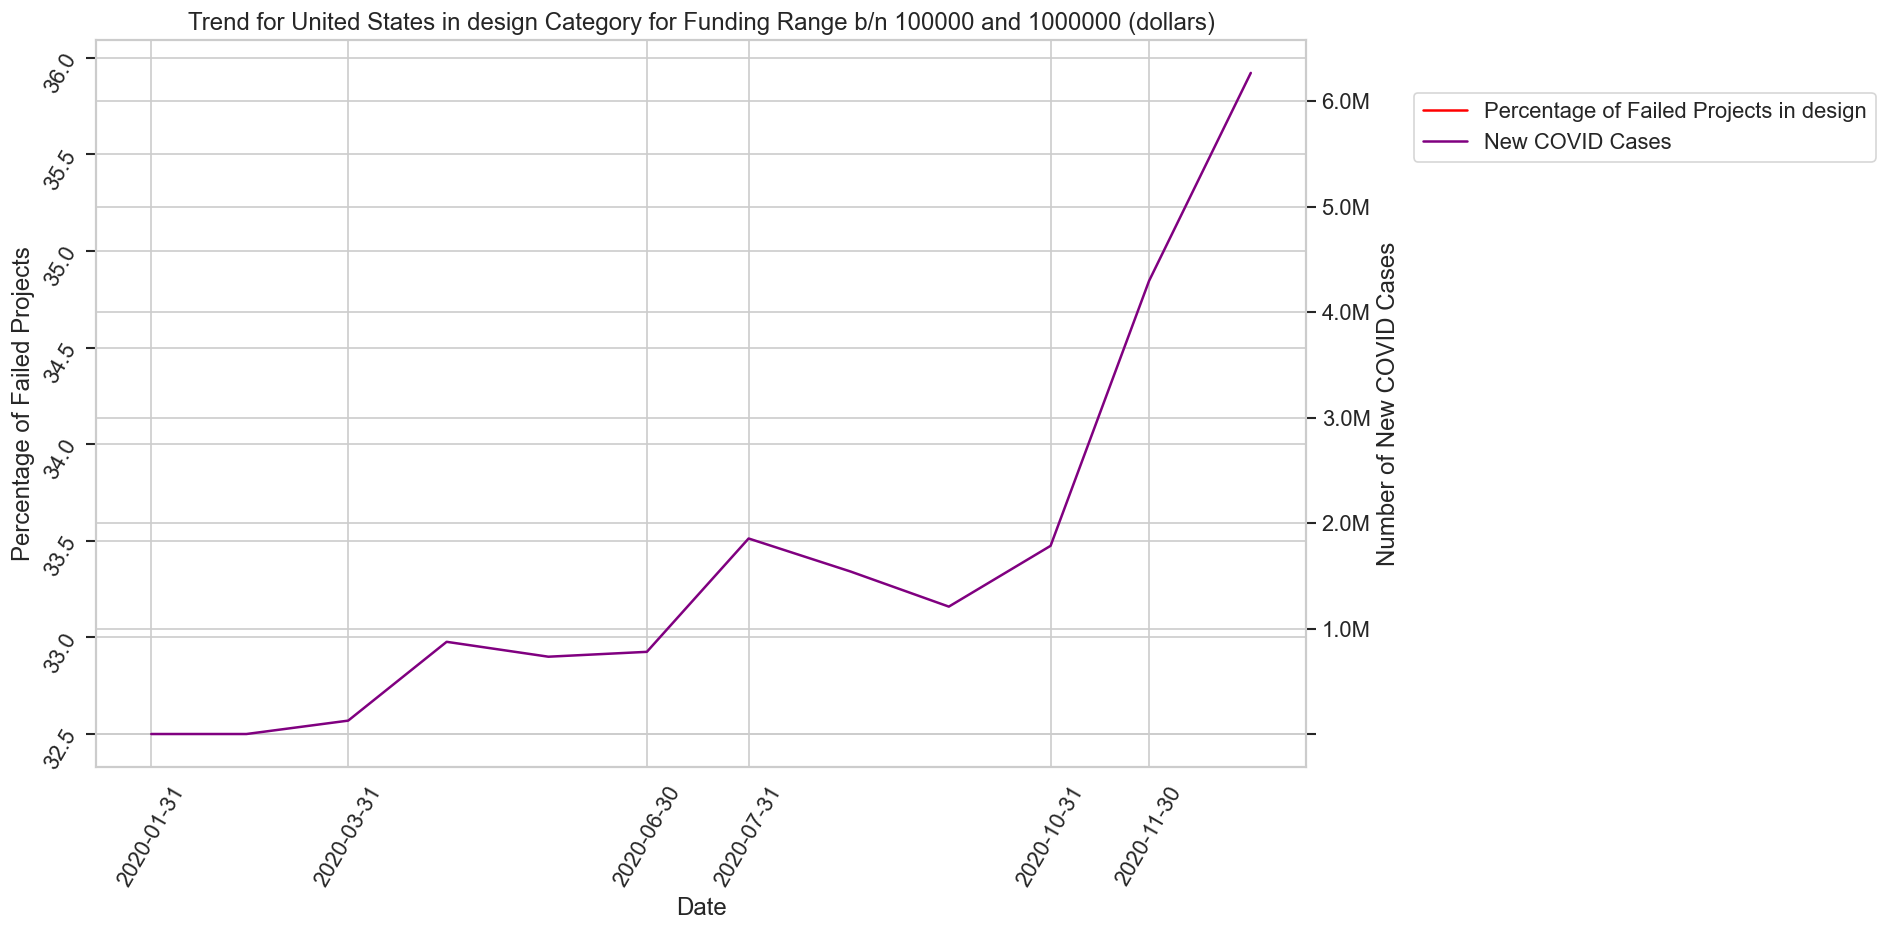

In [118]:
# plotting for different combinations of parameters

fr_percent_plots(100000, 1000000, 'United States', 'design')

In [53]:
# Next we plot the project counts in each category (and country) for each funding range

def fr_count_plots(x,y,country,category):
    #dataframe subset with the required range
    fr_xy = pd.DataFrame(df20[(df20['goal'] > x) & (df20['goal'] <= y)])
    #grouping for the first plot, we generate another dataframe
    fr_grp = pd.DataFrame(fr_xy.groupby([pd.Grouper(freq='M'), 'country_displayable_name', 
                                         'extracted_category'])['blurb'].count()).reset_index()
    
    # merging the above dataframe with covid dataframe
    merged = pd.merge(fr_grp, covid_monthly, how = 'inner', 
                  left_on = ['launched_at', 'country_displayable_name'], right_on= ['date', 'location'])
    # renaming some columns for plotting purposes
    merged.rename(columns={'new_cases_smoothed': 'NewCOVIDCases', 'blurb': 'ProjectCount',
                           'extracted_category': 'ProjectCategory'}, inplace=True)
    
    # creating plot
    # getting data for specific country
    con_data =  merged.loc[merged.location == country, :]
    # filtering this data by category
    cat_data = con_data.loc[con_data.ProjectCategory == category, :]
    # plotting
    # Use white grid plot background from seaborn
    sns.set(font_scale=1.2, style="whitegrid")
    #setting up plot
    fig = plt.figure(figsize=(12,8), dpi=120)
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot('date', 'ProjectCount', 
                 data=cat_data, color='coral', label='Number of Projects')
    ax2.plot('date', 'NewCOVIDCases', data=cat_data, color='purple', label='New COVID Cases')
    fig.legend(bbox_to_anchor = (1.2, .9))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Number of Projects')
    ax2.set_ylabel('Number of New COVID Cases')
    ax1.set_title('Trend for {} in {} Category for Funding Range b/n {} and {} (dollars)'.format(country, category,x,y))
    ax1.set_xticks(cat_data['date'].values)
    ax1.tick_params(labelrotation=60)
    
    # setting y-axis tickers (for covid cases) when value in millions
    def reformat_large_tick_values(tick_val, pos):
        if tick_val >= 1000000:
            val = round(tick_val/1000000, 2)
            new_tick_format = '{}M'.format(val)
            # make new_tick_format into a string value
            new_tick_format = str(new_tick_format)
            return new_tick_format
        
    # applying this fuction to actual values
    for x in cat_data['NewCOVIDCases']:
        if x > 1000000:
            ax2.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
        else:
            pass
        
    fig.tight_layout()
    plt.show()
  

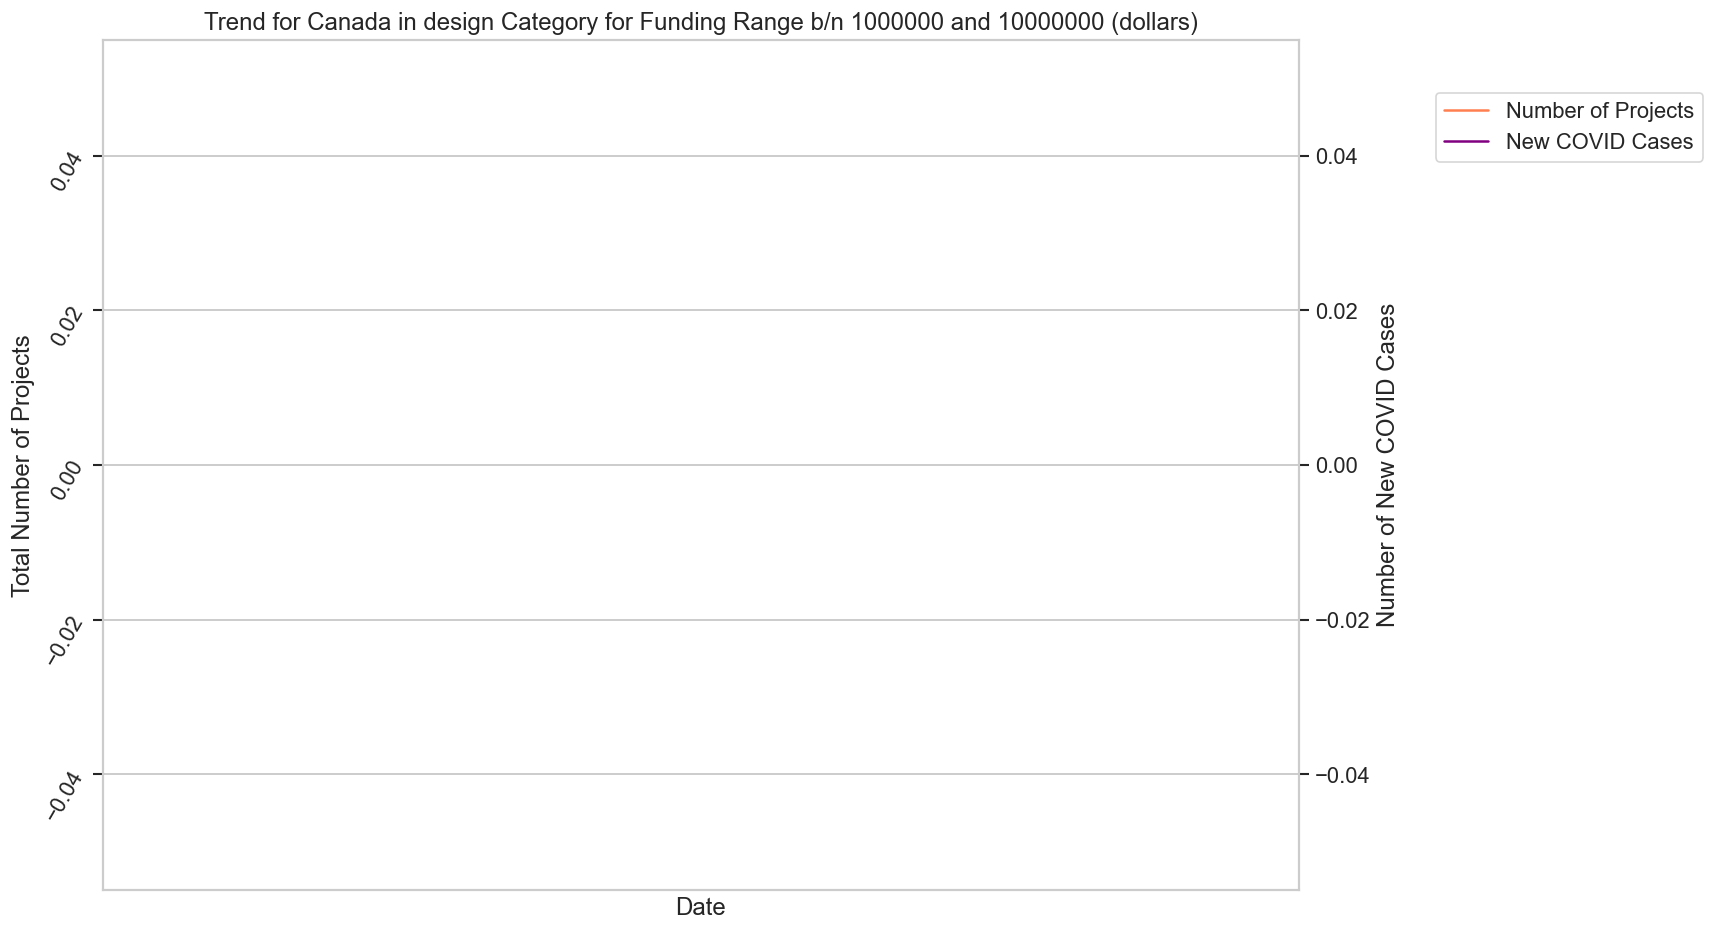

In [99]:
fr_count_plots(1000000, 10000000, 'Canada', 'design')